## Baseball Case Study
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [140]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,KFold


import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv('baseball.csv')


Chekcing for first 5 rows of the data

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Checking for last 5 rows of the dataset.

In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
print("The shape of the baseball dataset is:",df.shape)

The shape of the baseball dataset is: (30, 17)


Here in the dataset we have 30 rows and 17 columns. out of which 16 are the feature and 1 is label for our dataset.
Since the label W is continous data so it is a regressin problem and we will use regression models.

In [6]:
#Checking the columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All the columns are int and ERA is the only float datatype.Not any object datatypes is present here so we don't need to use any transformation techinque.

##### Now lets check if there is any null value present in our dataset

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

##### Luckily we got no null value or missing values in our dataset.

In [8]:
## Lets check for columns names in dataset.
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df['W'].unique() #Checking for unique values in 30 teams

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [10]:
df['W'].nunique() #total unique values  

24

In [11]:
df['W'].describe()

count     30.000000
mean      80.966667
std       10.453455
min       63.000000
25%       74.000000
50%       81.000000
75%       87.750000
max      100.000000
Name: W, dtype: float64

<AxesSubplot:xlabel='W', ylabel='count'>

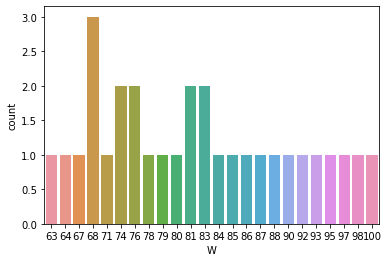

In [12]:
sns.countplot(df['W'])

This indicates the number of Wins credited to a pitcher.There are 3 teams who won same count of 68 , and 2 teams won - 74 , 76 , 81 & 83 for each count of match, all those who have won same number of matches are at draw position

In [13]:
df['R'].nunique()

28

<AxesSubplot:xlabel='R', ylabel='count'>

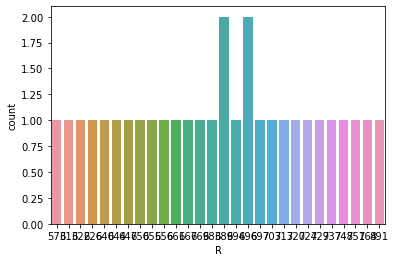

In [14]:
sns.countplot(df['R'])

2 teams made the same runs of different scores respectively



total number of unique count of at bat made by runners in teams is 29




<AxesSubplot:xlabel='AB', ylabel='count'>

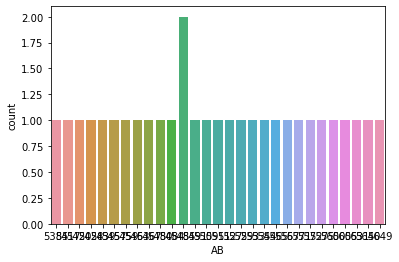

In [15]:

print("total number of unique count of at bat made by runners in teams is",df['AB'].nunique())
print("\n")
sns.countplot(df['AB'])

total number of unique count of base Hits in teams is 29




<AxesSubplot:xlabel='H', ylabel='count'>

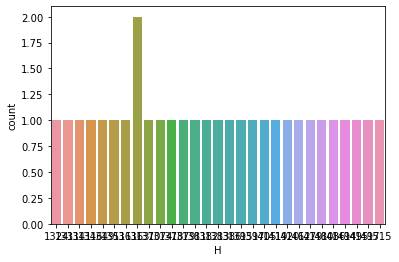

In [16]:
print("total number of unique count of base Hits in teams is",df['H'].nunique())
print("\n")
sns.countplot(df['H'])

*** Only two team made the same run

total number of unique count of Two-Base hit made by runners in teams is 22




<AxesSubplot:xlabel='2B', ylabel='count'>

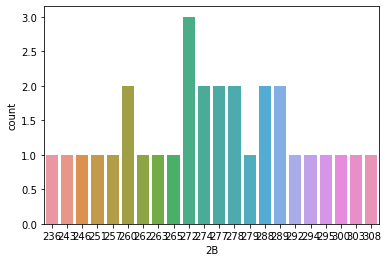

In [17]:
print("total number of unique count of Two-Base hit made by runners in teams is",df['2B'].nunique())
print("\n")
sns.countplot(df['2B'])

total number of unique count of 3-base hit made by runners in teams is 23




<AxesSubplot:xlabel='3B', ylabel='count'>

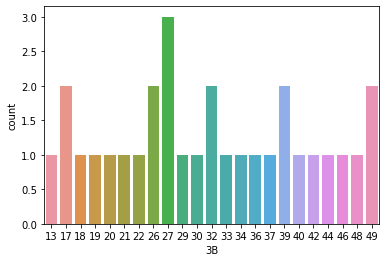

In [18]:
print("total number of unique count of 3-base hit made by runners in teams is",df['3B'].nunique())
print("\n")
sns.countplot(df['3B'])

We can clearly see the different teams made the 3 base hit a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice

total number of unique count of Home runs made by runners in teams is  27




<AxesSubplot:xlabel='HR', ylabel='count'>

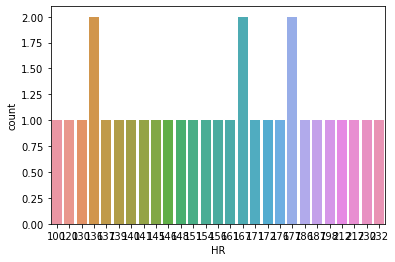

In [19]:
print("total number of unique count of Home runs made by runners in teams is ",df['HR'].nunique())
print("\n")
sns.countplot(df['HR'])

We can see from above countplot graph that 3 teams made the same Home Runs

total number of unique count of base on balls made by Strikers in teams is 29




<AxesSubplot:xlabel='BB', ylabel='count'>

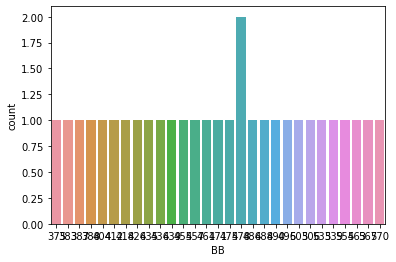

In [20]:
print("total number of unique count of base on balls made by Strikers in teams is",df['BB'].nunique())
print("\n")
sns.countplot(df['BB'])

from above visualization garph ,we  can see that one unique value awarded as BB for 2 teams out of all games

total number of unique count of Strikeouts of runners  in teams is 29




<AxesSubplot:xlabel='SO', ylabel='count'>

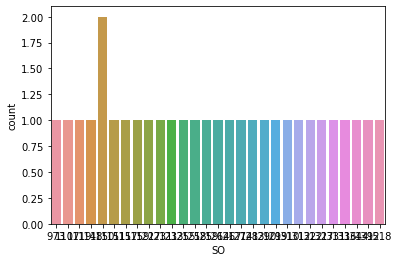

In [21]:
print("total number of unique count of Strikeouts of runners  in teams is",df['SO'].nunique())
print("\n")
sns.countplot(df['SO'])

Only 2 teams have the same number of strike outs of the batsmen.

total number of unique count of Stolen base made by  runners  in teams is 27




<AxesSubplot:xlabel='SB', ylabel='count'>

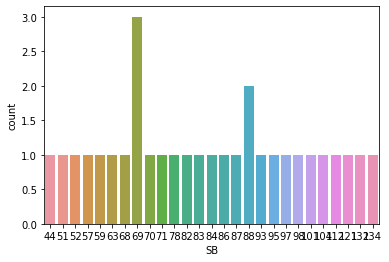

In [22]:
print("total number of unique count of Stolen base made by  runners  in teams is",df['SB'].nunique())
print("\n")
sns.countplot(df['SB'])

total number of unique count of Run Average made by  runners  in teams is 30




<AxesSubplot:xlabel='RA', ylabel='count'>

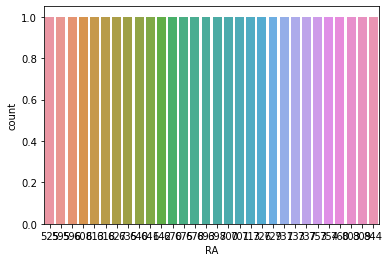

In [23]:
print("total number of unique count of Run Average made by  runners  in teams is",df['RA'].nunique())
print("\n")
sns.countplot(df['RA'])

total number of unique count of Earned run in  teams is 30




<AxesSubplot:xlabel='ER', ylabel='count'>

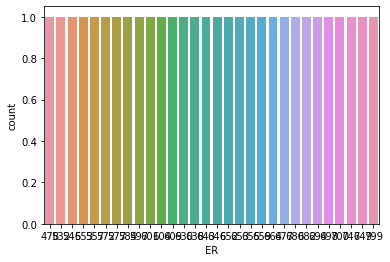

In [24]:
print("total number of unique count of Earned run in  teams is",df['ER'].nunique())
print("\n")
sns.countplot(df['ER'])

total number of unique count of Earned run  average in  teams is 30




<AxesSubplot:xlabel='ERA', ylabel='count'>

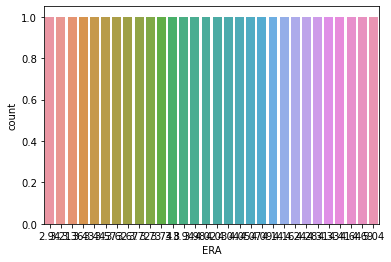

In [25]:
print("total number of unique count of Earned run  average in  teams is",df['ERA'].nunique())
print("\n")
sns.countplot(df['ERA'])

total number of unique count of Complete Game by teams are  9




<AxesSubplot:xlabel='CG', ylabel='count'>

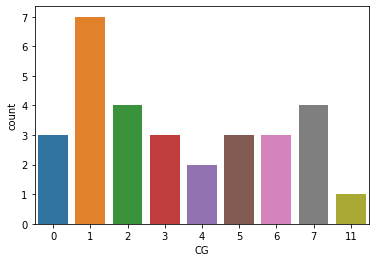

In [26]:
print("total number of unique count of Complete Game by teams are ",df['CG'].nunique())
print("\n")
sns.countplot(df['CG'])

from above countplot we can see 9 complete games by teams are  where player was the only pitcher for their team.

total number of unique count of Shutout by teams are  12




<AxesSubplot:xlabel='SHO', ylabel='count'>

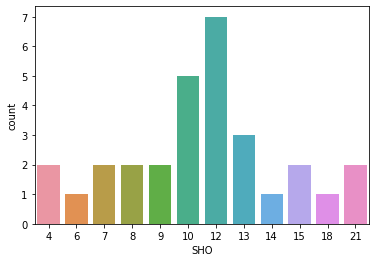

In [27]:
print("total number of unique count of Shutout by teams are ",df['SHO'].nunique())
print("\n")
sns.countplot(df['SHO'])

total number of unique count of Save by teams are  20




<AxesSubplot:xlabel='SV', ylabel='count'>

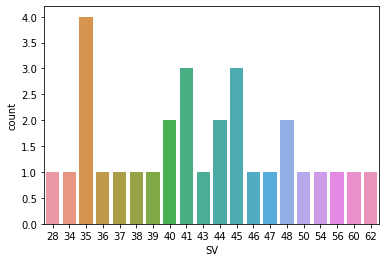

In [28]:
print("total number of unique count of Save by teams are ",df['SV'].nunique())
print("\n")
sns.countplot(df['SV'])

total number of unique count of Error by teams are  21




<AxesSubplot:xlabel='E', ylabel='count'>

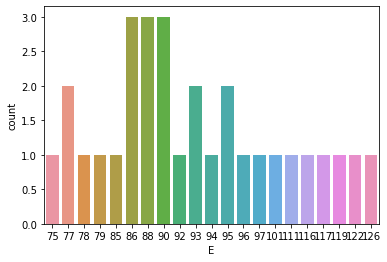

In [29]:
print("total number of unique count of Error by teams are ",df['E'].nunique())
print("\n")
sns.countplot(df['E'])

Number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [30]:
#lets check with the description of the dataset.
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


### Observations-
Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

1- As 'W' is a target variable so we do not see the statistics of the 'W' Column.

2- The columns which are describing the data with right datapoints are 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'RA','ER'.

3-There is a big gap between 75% and max values of 'R','HR','SO','SB','CG','SHO''SV' and 'E',column


All these gaps indicate that there are outliers present in our dataset which might need to be treated so as to get a better model accuracy later.

#### let’s visualize the distribution of continuous features by plotting the distribution plot and check the distribution.

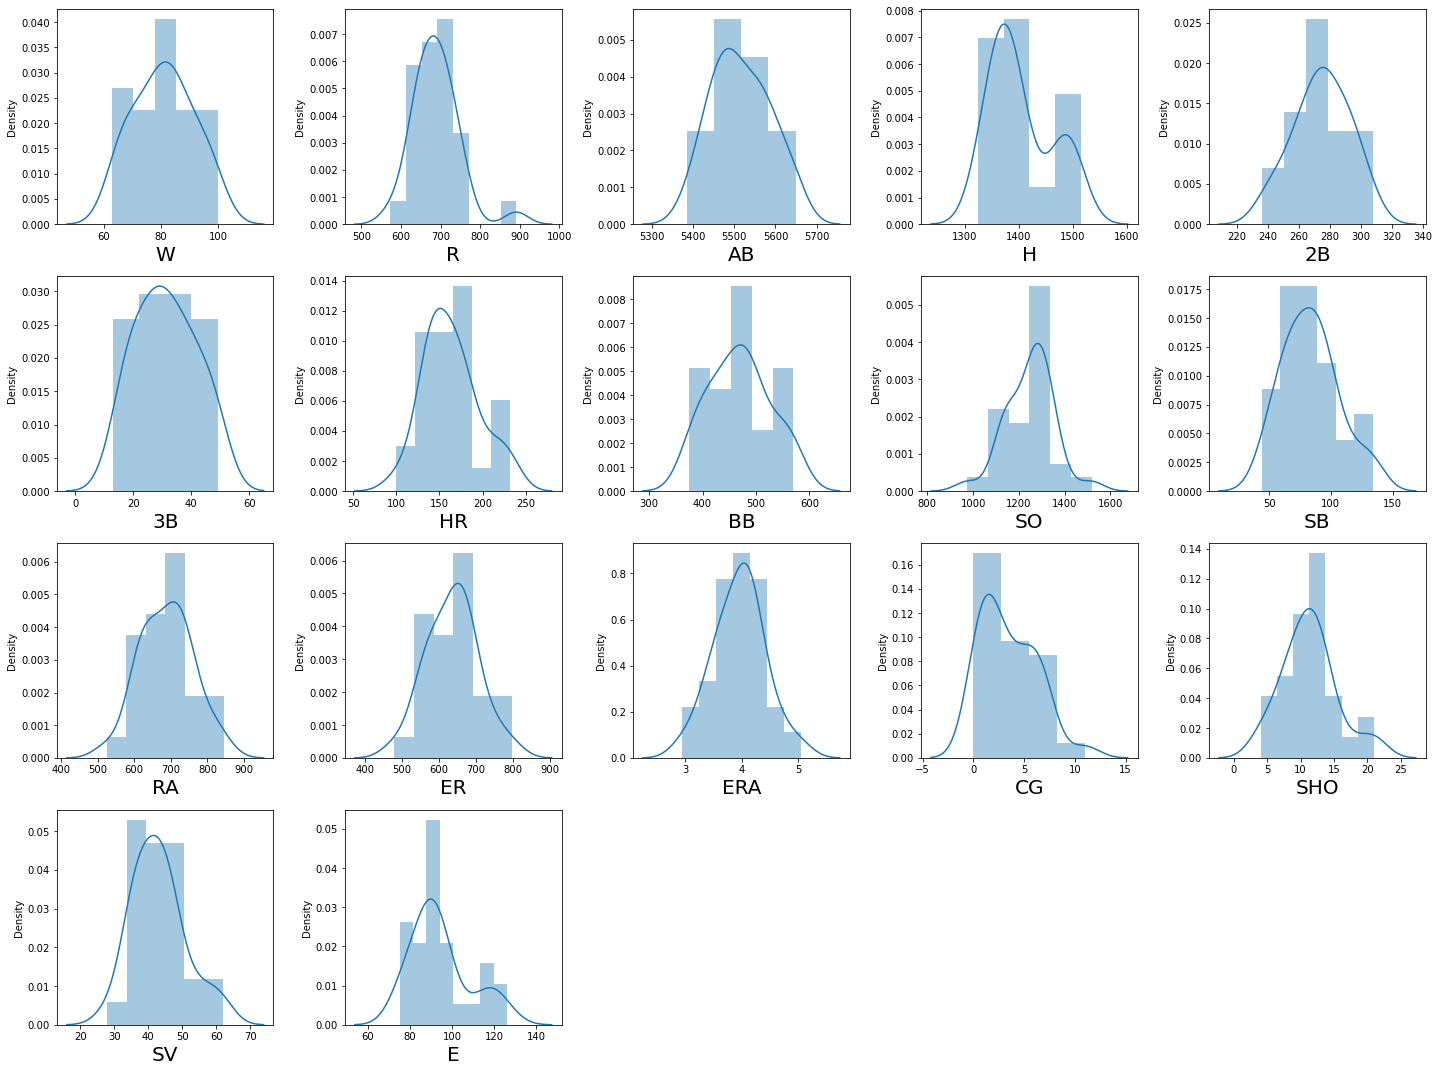

In [31]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in df:
    if plot_number<=17: 
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
        
        
    plot_number +=1
    
    
plt.tight_layout() 

#### Observation-
The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in some of the feature columns like R, SHO, SV,and E columns. 

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

In [32]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Here we see the skewness information present in our dataset. We will ignore W since it is our target label in the dataset. Now taking a look at all the feature columns we see that R,H,CG,SHO,SV,E are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

#### Similarly plot the boxplot and visully chekc for the outliers present in the mentioned columns in describe() method

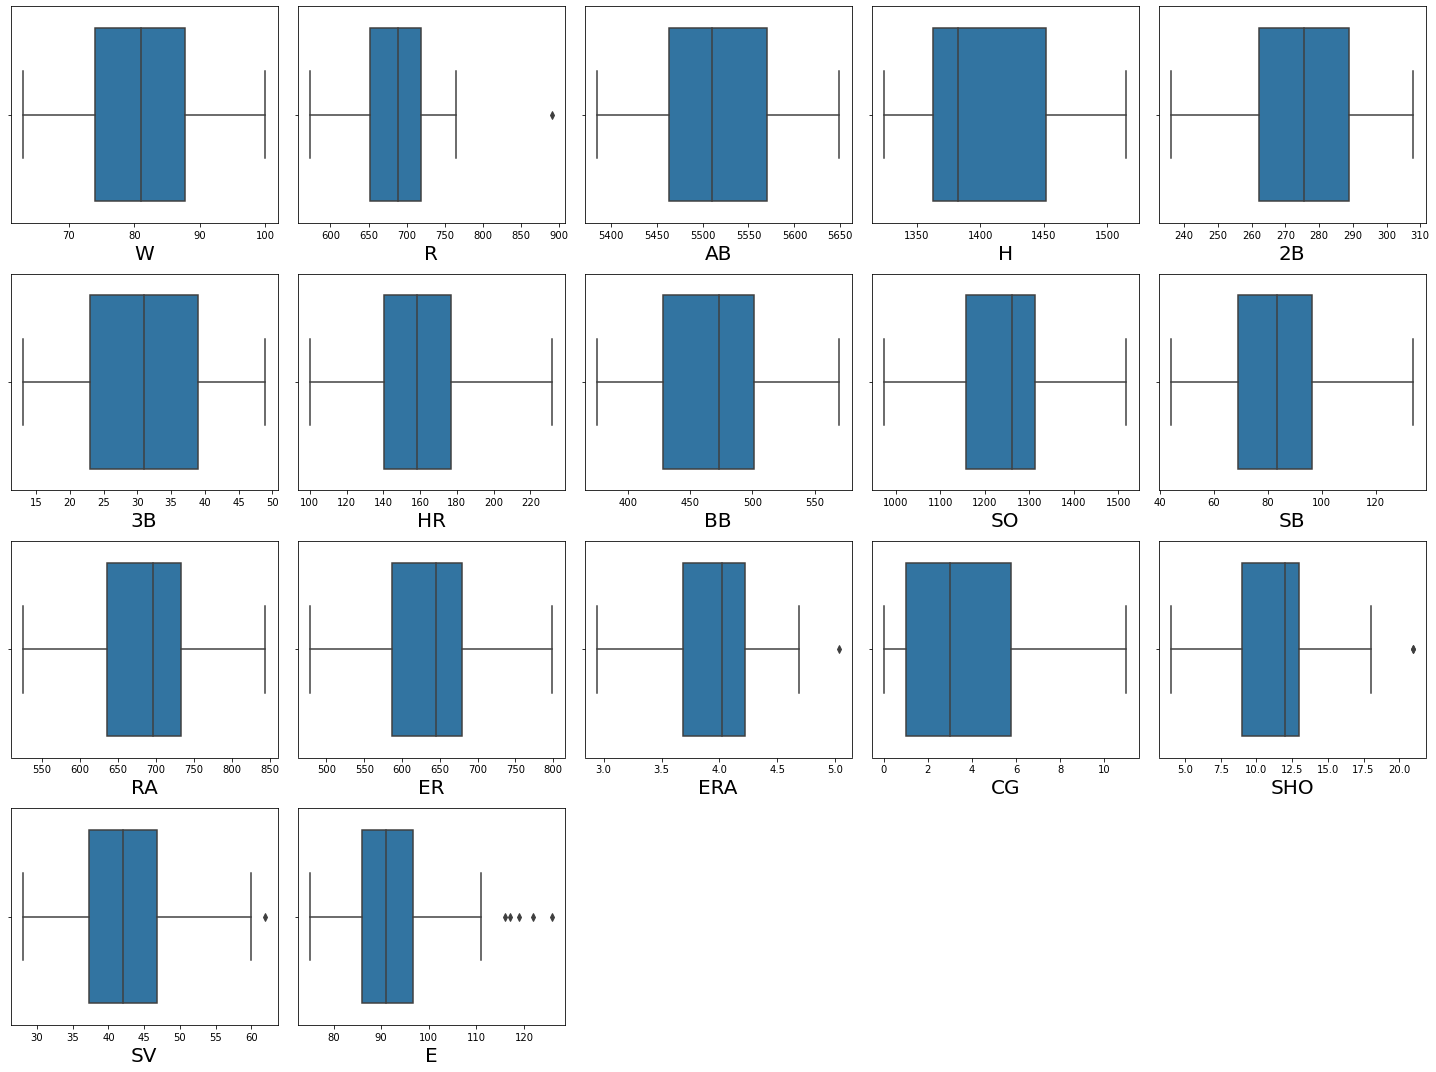

In [33]:


plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in df:
    if plot_number<=17: 
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column]) 
        plt.xlabel(column,fontsize=20)
        
        
    plot_number +=1
    
    
plt.tight_layout() 

#### After visulizing using boxplot  we can clearly see that there are ouliers present in -R,ERA,SHO,SV,and E columns.
With the help of the above boxplot we are able to see the whisker details and outliers clearly. The outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset

### Removing outliers using zscore method

In [34]:
from scipy.stats import zscore

In [35]:
print("Before outlier removal Shape of dataset is",df.shape)

Before outlier removal Shape of dataset is (30, 17)


In [36]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

dfs=df[(z<3).all(axis=1)]
dfs

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [37]:
print("After outlier removal Shape of dataset is",dfs.shape)

After outlier removal Shape of dataset is (29, 17)


After removing outliers the data set has 29 rows and 17 columns. i.e only one row is deleted.



In [38]:
#dataloss
dl=(1/30)
print("Dataloss:",dl)

Dataloss: 0.03333333333333333


In [39]:
#Checking for skewness again
dfs.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

#### Skewnes is still there in H,CG,SHO,SV,and E cloumns .altough it got reduced a bit than earlier.

In [40]:
dfskew=pd.DataFrame({})
dfskew['Columns']=df.columns
dfskew['Before']=list(df.skew())
dfskew['After']=list(dfs.skew())

dfskew

,Columns,Before,After
0,W,0.047089,0.119013
1,R,1.200786,-0.215364
2,AB,0.183437,0.169573
3,H,0.670254,0.783772
4,2B,-0.230650,-0.335304
5,3B,0.129502,0.090124
6,HR,0.516441,0.450862
7,BB,0.158498,0.151193
8,SO,-0.156065,-0.233815
9,SB,0.479893,0.494966


#### Using Log Transform to fix skewness

skewness in H: 0.7837722117274881


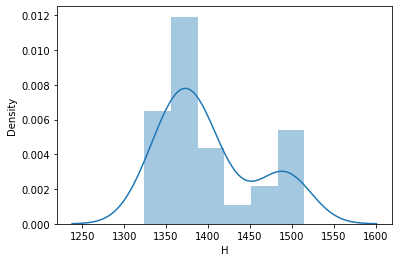

In [42]:
sns.distplot(dfs['H'])
print("skewness in H:",dfs['H'].skew())

In [43]:
dfs['H']=np.log(dfs['H'])


skewness in H: 0.7384225982580486


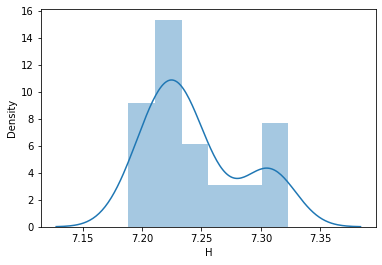

In [44]:
sns.distplot(dfs['H'])
print("skewness in H:",dfs['H'].skew())

skewness in CG: 0.8549795901105167


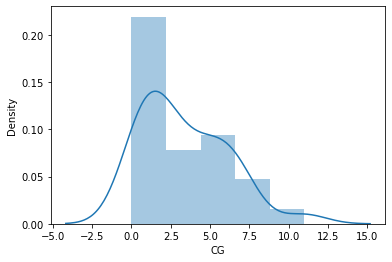

In [45]:
sns.distplot(dfs['CG'])
print("skewness in CG:",dfs['CG'].skew())

In [46]:
dfs['CG'].min()

0

#### Here min value is 0 so we cannot aply log transformation technique so adding a constant to the column , since it is CG, the min. value we can add is 1


In [47]:
dfs['CG']=dfs['CG']+1

In [48]:
#we added 1 to the entire column. Now let us see the min. value to confirm and check wethere the skewness changed
print(dfs['CG'].min())
print(dfs['CG'].skew())


1
0.8549795901105163


In [49]:
dfs['CG']=np.log(dfs['CG'])

In [50]:
print(dfs['CG'].skew())

-0.27568126677232746


<AxesSubplot:xlabel='CG', ylabel='Density'>

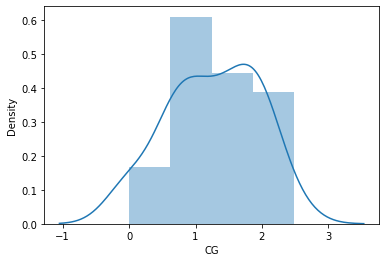

In [51]:
sns.distplot(dfs['CG'])

skewness in H: 0.5269430585305683


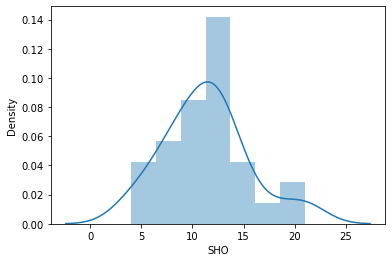

In [52]:
sns.distplot(dfs['SHO'])
print("skewness in H:",dfs['SHO'].skew())

In [53]:
dfs['SHO']=np.log(dfs['SHO'])

In [54]:
print("skewness in SHO:",dfs['SHO'].skew())

skewness in SHO: -0.7261238398670306


After Skewness removal


<AxesSubplot:xlabel='SHO', ylabel='Density'>

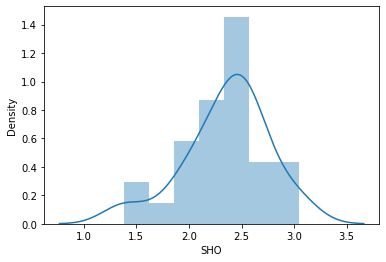

In [55]:
print("After Skewness removal")
sns.distplot(dfs['SHO'])


skewness in SV: 0.6274804879503074


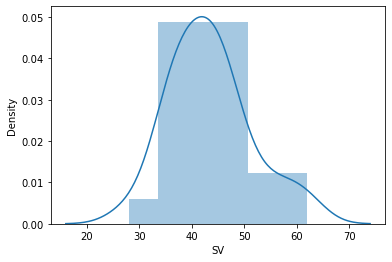

In [56]:
sns.distplot(dfs['SV'])
print("skewness in SV:",dfs['SV'].skew())

In [57]:
df['SV'].min()

28

In [58]:
dfs['SV']=np.log(dfs['SV'])

skewness in SV: 0.09675174266622452


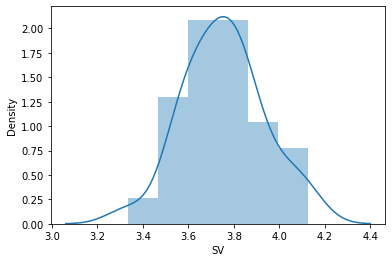

In [59]:
sns.distplot(dfs['SV'])
print("skewness in SV:",dfs['SV'].skew())

skewness in E: 0.8402711976867623


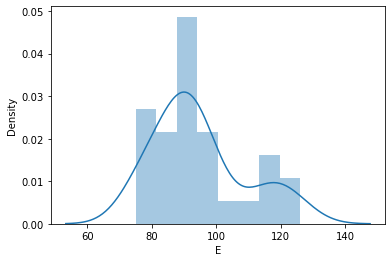

In [60]:
sns.distplot(dfs['E'])
print("skewness in E:",dfs['E'].skew())

In [61]:
dfs['E'].min()

75

In [62]:
dfs['E']=np.log(dfs['E'])

After SKewness:
skewness in E: 0.5833075389348484


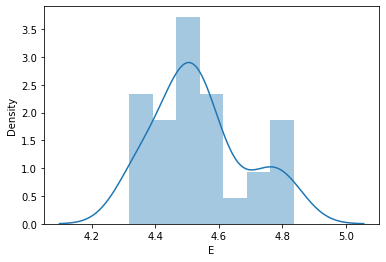

In [63]:
print("After SKewness:")
sns.distplot(dfs['E'])
print("skewness in E:",dfs['E'].skew())

In [64]:
dfskew["After np.log skewness"]=list(dfs.skew())
dfskew

,Columns,Before,After,After np.log skewness
0,W,0.047089,0.119013,0.119013
1,R,1.200786,-0.215364,-0.215364
2,AB,0.183437,0.169573,0.169573
3,H,0.670254,0.783772,0.738423
4,2B,-0.230650,-0.335304,-0.335304
5,3B,0.129502,0.090124,0.090124
6,HR,0.516441,0.450862,0.450862
7,BB,0.158498,0.151193,0.151193
8,SO,-0.156065,-0.233815,-0.233815
9,SB,0.479893,0.494966,0.494966


#### Afetr using Np.log method we have reduced our skewness for Columns-: 


1-CG- from 0.85 to -0.27
    
2-for SHO column Skewness reduced from 0.52 to -0.72

3-for SV column Skewness reduced from 0.62 to -0.096

4-for E column Skewness reduced from 0.84 to 0.58

#### Now lets again visulise the columns.

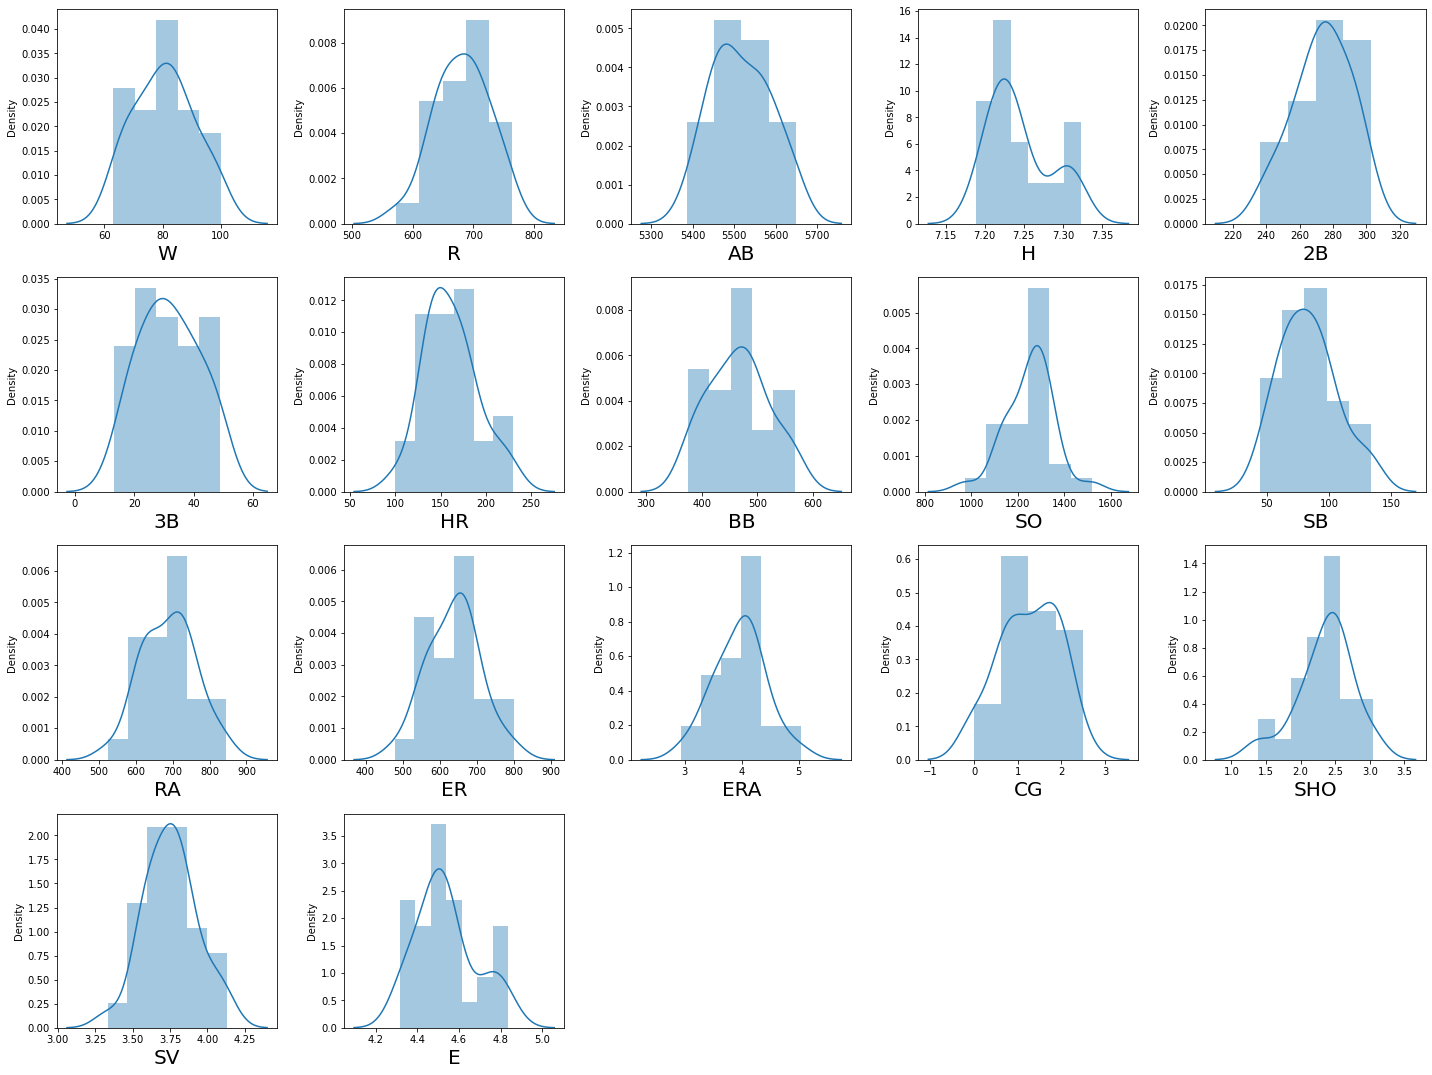

In [65]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in dfs:
    if plot_number<=17: 
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(dfs[column]) 
        plt.xlabel(column,fontsize=20)
        
        
    plot_number +=1
    
    
plt.tight_layout() 

#### Now as we have removed the skewness from the the dataset , let check for the correlationship and multicolineraity.

In [66]:
#the dataset without skwewness is dfs.
dfs.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.020787,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.000122,0.445758,0.756870,-0.075036
R,0.390451,1.000000,0.438022,0.432235,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.164021,-0.159190,0.080480,0.041183
AB,-0.085780,0.438022,1.000000,0.770155,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.056349,-0.190047,-0.142765,0.321901
H,-0.020787,0.432235,0.770155,1.000000,0.527354,0.579733,-0.219201,-0.221773,-0.373302,0.420201,0.243639,0.279955,0.255885,0.062588,-0.122532,-0.100068,-0.012819
2B,0.384886,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.226900,0.088240,0.245977,0.147011
3B,-0.206737,0.134204,0.445604,0.579733,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.002910,-0.076306,-0.260995,0.098432
HR,0.245697,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.126024,-0.072227,0.100948,-0.182292
BB,0.447513,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.448140,0.384340,0.205484,-0.052399
SO,0.156469,0.081158,-0.111243,-0.373302,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.068395,0.163936,0.120450,0.152677
SB,-0.169503,0.075323,0.373674,0.420201,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.042099,-0.088083,-0.193938,0.077965


#### Plotting the heatmap for better understanding

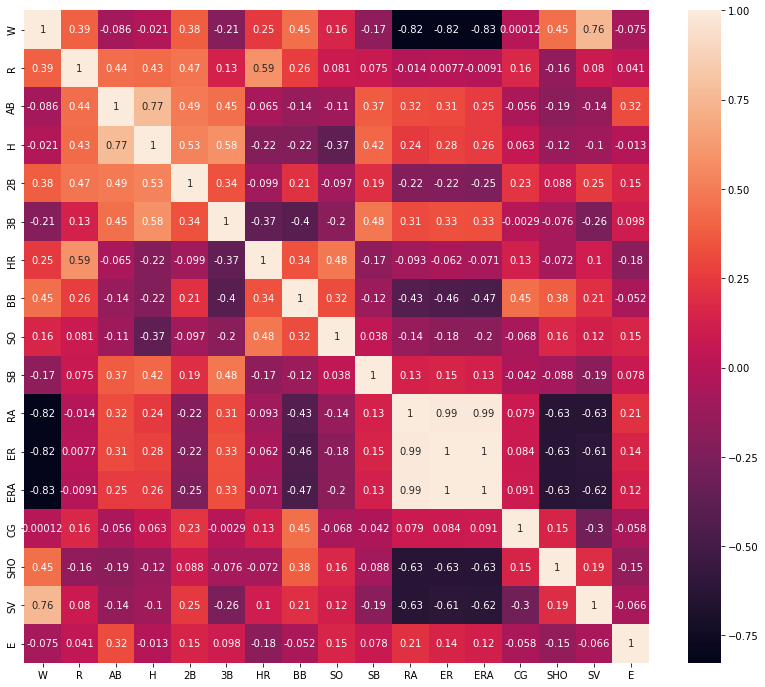

In [67]:
plt.figure(figsize=(14,12))
sns.heatmap(dfs.corr(),annot=True,annot_kws={'size':10})
plt.show()

I see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that W column is positively correlated with E and it is negatively correlated with the H. The W column is least correlated with CG showing a coefficient value of 0.00012 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.

Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.

Right now I see columns ER and RA are positively correlated with a value of 0.99 which is close to 1. Similary, columns ERA and RA are positively correlated with a value of 0.99 again being close to 1.  The other negatively correlated columns that pop up are SV and RA  with a value -0.63 being close to the value -1.

We may need to deal with multicollinearity later if required to improve the accuracy of our machine learning models.

#### Checking by Scatter plot to confirm Multicolinearity

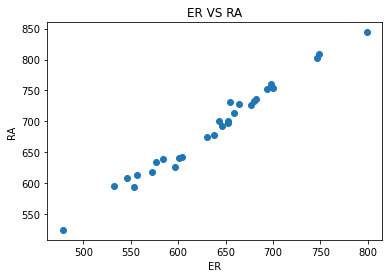

In [68]:
plt.scatter(x='ER',y='RA',data=dfs)
plt.xlabel('ER')
plt.ylabel('RA')
plt.title('ER VS RA')
plt.show()

I can see a positive trend between these 2 feature as long total ER increasing so is RA' increasing.SO we can drop ER as less correaled to W our target variable.Similarly we can check for ERA and RA

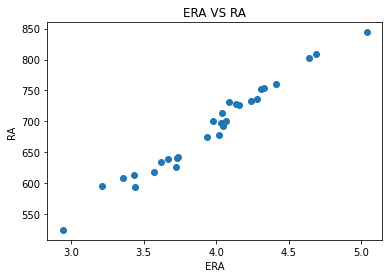

In [69]:
plt.scatter(x='ERA',y='RA',data=dfs)
plt.xlabel('ERA')
plt.ylabel('RA')
plt.title('ERA VS RA')
plt.show()

 Similary we can see a positive trend between these 2 feature as long total ERA increasing so is RA' increasing.
 Lets check by cheking VIF of the columns and decide which one to delete.

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Seprating Features and label column.

In [71]:
x=dfs.drop('W',axis=1) #features
y=dfs['W'] #label

In [72]:
x.shape

(29, 16)

In [73]:
y.shape

(29,)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.95939835,  0.83008422,  1.72371546,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.24041455, -0.69920602,  1.55215675,
        -0.43529008],
       [ 0.33114717, -0.70283074, -0.94985367,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.24041455,  0.32340651,  0.29800664,
        -0.5978505 ],
       [-0.27466646, -1.10025314, -0.08868729,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  1.81571095, -0.13642174, -0.67162101,
        -1.19818012],
       [-1.32923093,  0.23395062, -0.34773808, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.21433279, -0.40214863, -0.82455945,
         0.53898766],
       [ 0.17408438,  1.25589393,  2

In [76]:
vif=pd.DataFrame({})
vif['Columns']=x.columns
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]

In [77]:
vif

,Columns,vif
0,R,7.159353
1,AB,19.020883
2,H,9.605248
3,2B,3.433670
4,3B,3.060381
5,HR,8.709988
6,BB,3.194773
7,SO,2.711738
8,SB,1.869541
9,RA,191.938454


From above vif dataframe we can clearly see that we can drop column ER as it has less correaltion with Traget W and higher vif

In [78]:
x.drop('ER',axis=1,inplace=True)



In [79]:
#we can drop RA but since we have very less dataset so we can keep it as we got 16 columns only.

x.shape

(29, 15)

lets check the pairlot of the datset and check for relation visulaly

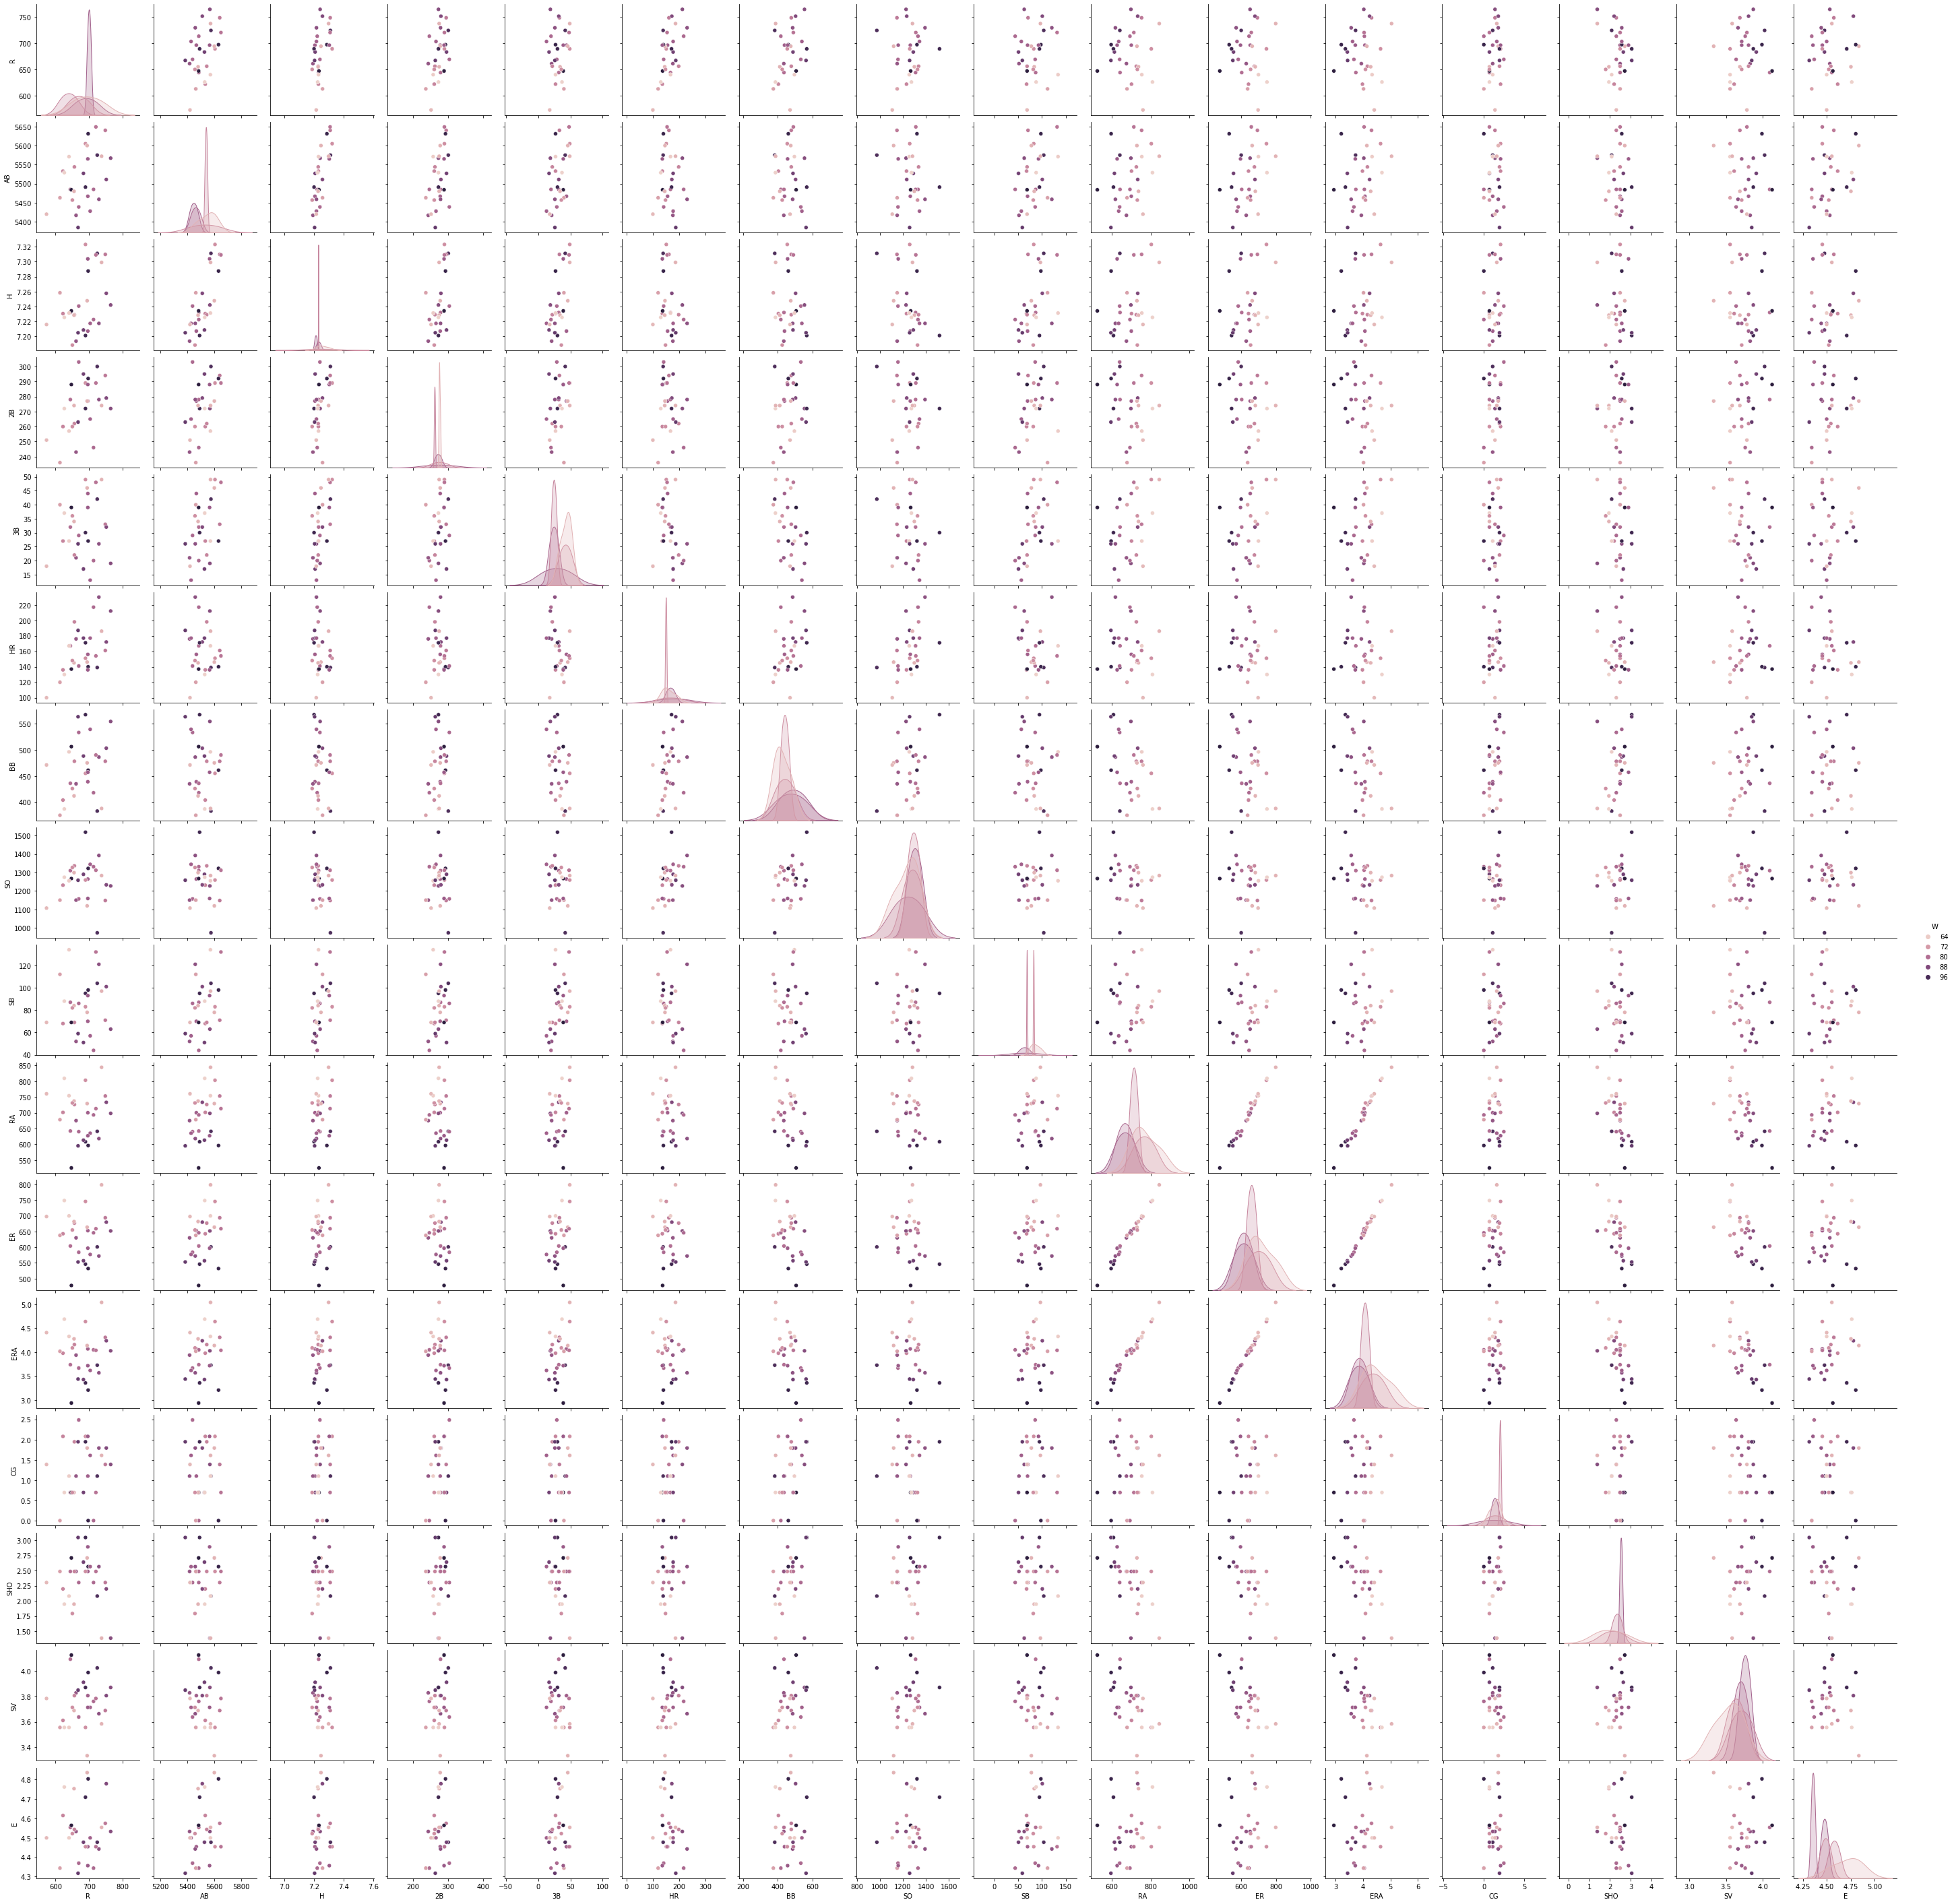

In [80]:
sns.pairplot(dfs,hue='W')
plt.show()

#### Visually checking for scatterplot wheter the features are following the trend or not.
#### Bivariate Ananlysis

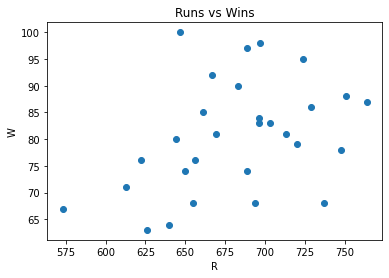

In [83]:
plt.scatter(x='R',y='W',data=dfs)
plt.xlabel('R')
plt.ylabel('W')
plt.title('Runs vs Wins')
plt.show()

Both of the columns following the trend increase in R- W is increasing

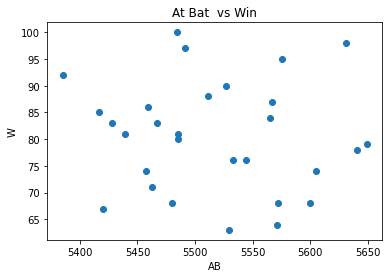

In [84]:
plt.scatter(x='AB',y='W',data=dfs)
plt.xlabel('AB')
plt.ylabel('W')
plt.title('At Bat  vs Win')
plt.show()

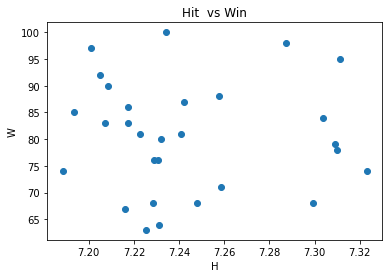

In [85]:
plt.scatter(x='H',y='W',data=dfs)
plt.xlabel('H')
plt.ylabel('W')
plt.title('Hit  vs Win')
plt.show()

No defined relationship between Hita nd Wins

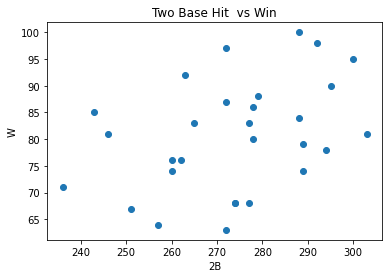

In [86]:
plt.scatter(x='2B',y='W',data=dfs)
plt.xlabel('2B')
plt.ylabel('W')
plt.title('Two Base Hit  vs Win')
plt.show()

We see a positive corelationhip between 2B and Win

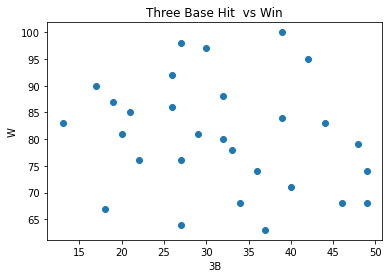

In [87]:
plt.scatter(x='3B',y='W',data=dfs)
plt.xlabel('3B')
plt.ylabel('W')
plt.title('Three Base Hit  vs Win')
plt.show()

Positive correalted.

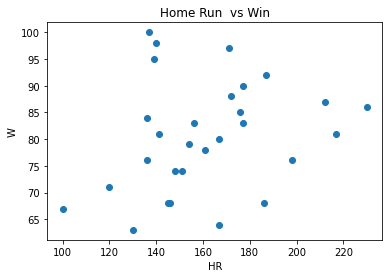

In [88]:
plt.scatter(x='HR',y='W',data=dfs)
plt.xlabel('HR')
plt.ylabel('W')
plt.title('Home Run  vs Win')
plt.show()

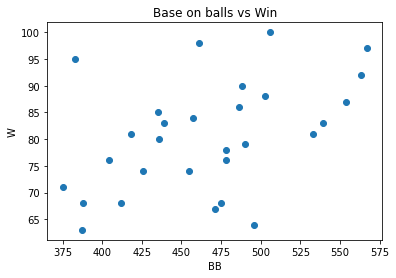

In [89]:
plt.scatter(x='BB',y='W',data=dfs)
plt.xlabel('BB')
plt.ylabel('W')
plt.title('Base on balls vs Win')
plt.show()

W is increasing as BB isncreses

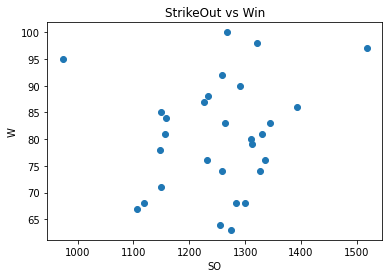

In [90]:
plt.scatter(x='SO',y='W',data=dfs)
plt.xlabel('SO')
plt.ylabel('W')
plt.title('StrikeOut vs Win')
plt.show()

W is increasing as SO increases

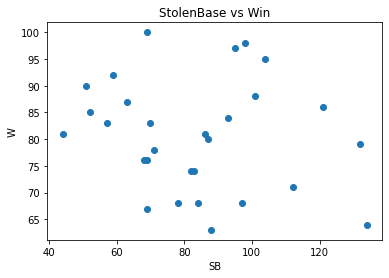

In [91]:
plt.scatter(x='SB',y='W',data=dfs)
plt.xlabel('SB')
plt.ylabel('W')
plt.title('StolenBase vs Win')
plt.show()

Here relationship between SB and W cannot be defined properly

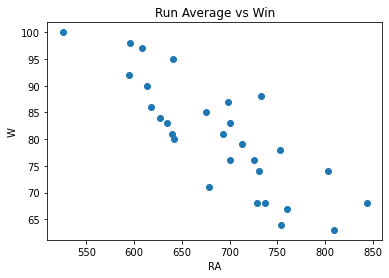

In [92]:
plt.scatter(x='RA',y='W',data=dfs)
plt.xlabel('RA')
plt.ylabel('W')
plt.title('Run Average vs Win')
plt.show()

W is decreasing as RA increases- Negative relationship

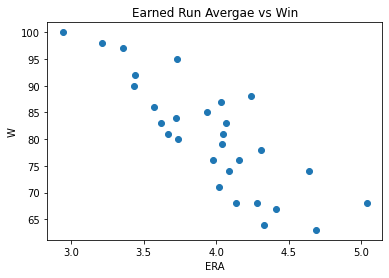

In [93]:
plt.scatter(x='ERA',y='W',data=dfs)
plt.xlabel('ERA')
plt.ylabel('W')
plt.title('Earned Run Avergae vs Win')
plt.show()

W is decreasing as ERA increses-Negative relationship

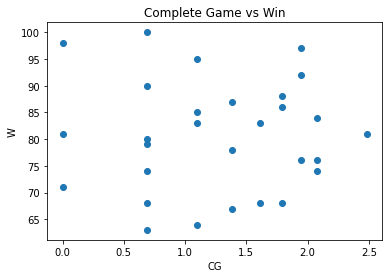

In [94]:
plt.scatter(x='CG',y='W',data=dfs)
plt.xlabel('CG')
plt.ylabel('W')
plt.title('Complete Game vs Win')
plt.show()

No much relationship  between CG and Wins

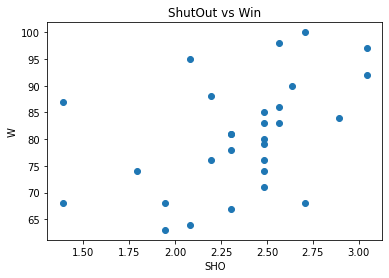

In [95]:
plt.scatter(x='SHO',y='W',data=dfs)
plt.xlabel('SHO')
plt.ylabel('W')
plt.title('ShutOut vs Win')
plt.show()

W increasing as SO increases

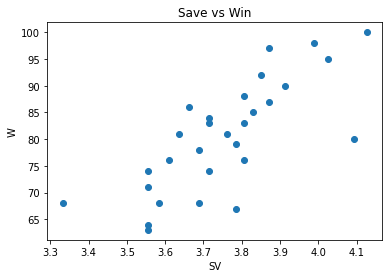

In [96]:
plt.scatter(x='SV',y='W',data=dfs)
plt.xlabel('SV')
plt.ylabel('W')
plt.title('Save vs Win')
plt.show()

W is increasing as SV increases

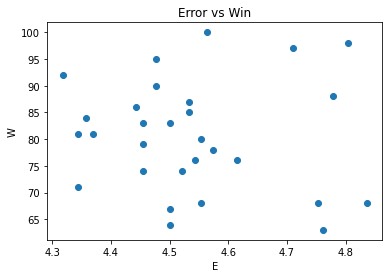

In [97]:
plt.scatter(x='E',y='W',data=dfs)
plt.xlabel('E')
plt.ylabel('W')
plt.title('Error vs Win')
plt.show()

No defined relationship between Error and Win

### Now data is cleaned now we can split the dataset into features and label.


### Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label

In [98]:
print("Features Shape",x.shape)
print("Label shape",y.shape)

Features Shape (29, 15)
Label shape (29,)


In [99]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=ms.fit_transform(x)
x_scaled

array([[0.79057592, 0.71969697, 0.91130519, 0.95522388, 0.80555556,
        0.3       , 0.04166667, 0.        , 0.66666667, 0.36363636,
        0.37619048, 0.44211411, 0.41800473, 0.87196016, 0.30811606],
       [0.64397906, 0.31060606, 0.1388127 , 0.6119403 , 0.86111111,
        0.43076923, 0.33333333, 0.53394495, 0.28888889, 0.54858934,
        0.53809524, 0.44211411, 0.66252182, 0.59685514, 0.26380266],
       [0.5026178 , 0.20454545, 0.38763535, 1.        , 0.44444444,
        0.31538462, 0.82291667, 0.33761468, 0.46666667, 0.36050157,
        0.34761905, 1.        , 0.5525722 , 0.38416175, 0.1001549 ],
       [0.2565445 , 0.56060606, 0.31278605, 0.35820896, 0.38888889,
        0.27692308, 0.15104167, 0.4733945 , 0.26666667, 0.55172414,
        0.4952381 , 0.83682884, 0.48903419, 0.35061382, 0.57370078],
       [0.60732984, 0.83333333, 1.        , 0.79104478, 1.        ,
        0.39230769, 0.41666667, 0.52477064, 0.43333333, 0.87147335,
        0.80952381, 0.83682884, 0.66252182, 

### Now we Scaled the features so we start using models for the fetaures and label.

#### For best RandomState

In [100]:
lr=LinearRegression()

In [188]:
maxr2=0
mse=0
best_score=0
rs=0
lr=LinearRegression()
for i in range(1000):
    #splitting the model 80% for train and 20% for test  
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    predl=lr.predict(x_test)
    r2=r2_score(y_test,predl)
    ms=mean_squared_error(y_test,predl)
    if maxr2<r2:
        maxr2=r2
        mse=ms
        best_score=score
        rs=i
print(f"Best random state is: {rs}\n where best score is {best_score} \n where r2 score is {maxr2}\n and mean squared error is {mse}  ")
        

Best random state is: 280
 where best score is 0.937580477168967 
 where r2 score is 0.9506367192481386
 and mean squared error is 6.259538239784646  


##### We got random state 280 as best randm state so choosing this random state

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=280)


splitted the data successfully into train and test at random_state 280



In [121]:
print("Shape of x_train",x_train.shape)    
print("Shape of x_test",x_test.shape)    
print("Shape of y_train",y_train.shape)    
print("Shape of y_test",y_test.shape)    

Shape of x_train (23, 15)
Shape of x_test (6, 15)
Shape of y_train (23,)
Shape of y_test (6,)


### Writing one function for different models accuracy


In [122]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train,y_train)
    if train==True:
        y_pred=clf.predict(x_train)
        print('=================Train Result================')
        print(f"r2 Score of {clf}:{r2_score(y_train,y_pred)*100:.2f}%")
        print(f"score of  {clf}:",clf.score(x_train,y_train))

        
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print('=================Test Result================')
        print(f"score of {clf}:",clf.score(x_test,y_test))
        print(f"r2 score:{r2_score(y_test,pred)*100:.2f}%")
        
        print('\nMean absolute Error: ',mean_absolute_error(y_test,pred))
        print('Mean Squared Error: ',mean_squared_error(y_test,pred))
        print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))


### Linear Regression 

In [123]:
lr=LinearRegression()


In [124]:
print("R2 Score for Linear Regression Model:\n")
metric_score(lr,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(lr,x_train,x_test,y_train,y_test,train=False) #for testing

R2 Score for Linear Regression Model:

=================Train Result================
r2 Score of LinearRegression():93.76%
score of  LinearRegression(): 0.937580477168967
=================Test Result================
score of LinearRegression(): 0.9506367192481386
r2 score:95.06%

Mean absolute Error:  2.209571910873194
Mean Squared Error:  6.259538239784646
Root Mean Squared Error:  2.5019069206876274


#### Let us import and try other models

In [125]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

### Decision Tree

In [126]:
dt=DecisionTreeRegressor()

In [127]:
print("Accuracy Score for Decision Tree Model:\n")
metric_score(dt,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(dt,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for Decision Tree Model:

=================Train Result================
r2 Score of DecisionTreeRegressor():100.00%
score of  DecisionTreeRegressor(): 1.0
=================Test Result================
score of DecisionTreeRegressor(): 0.7778751369112815
r2 score:77.79%

Mean absolute Error:  4.166666666666667
Mean Squared Error:  28.166666666666668
Root Mean Squared Error:  5.307227776030219


#### KNeighborsRegressor

In [128]:
knn=KNeighborsRegressor()

In [129]:
print("Accuracy Score for KNN Model:\n")
metric_score(knn,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(knn,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for KNN Model:

=================Train Result================
r2 Score of KNeighborsRegressor():57.72%
score of  KNeighborsRegressor(): 0.5771508293287865
=================Test Result================
score of KNeighborsRegressor(): 0.593550930996714
r2 score:59.36%

Mean absolute Error:  5.3
Mean Squared Error:  51.54000000000002
Root Mean Squared Error:  7.179136438319028


### SVR

In [130]:
svr=SVR()

In [131]:
print("Accuracy Score for SVRModel:\n")
metric_score(svr,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(svr,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for SVRModel:

=================Train Result================
r2 Score of SVR():23.83%
score of  SVR(): 0.23832585734790468
=================Test Result================
score of SVR(): 0.0906553495543817
r2 score:9.07%

Mean absolute Error:  8.540737959209224
Mean Squared Error:  115.3099535912291
Root Mean Squared Error:  10.738247230867294


#### Lasso

In [134]:
lasso=Lasso()

In [135]:
print("Accuracy Score for Lasso Model:\n")
metric_score(lasso,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(lasso,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for Lasso Model:

=================Train Result================
r2 Score of Lasso():48.78%
score of  Lasso(): 0.48783730033710293
=================Test Result================
score of Lasso(): 0.4997883936190689
r2 score:49.98%

Mean absolute Error:  6.010680167933882
Mean Squared Error:  63.42961064247084
Root Mean Squared Error:  7.964270879526314


### Ridge

In [136]:
ridge=Ridge()

In [137]:
print("Accuracy Score for SVRModel:\n")
metric_score(ridge,x_train,x_test,y_train,y_test,train=True) #for training

metric_score(ridge,x_train,x_test,y_train,y_test,train=False) #for testing

Accuracy Score for SVRModel:

=================Train Result================
r2 Score of Ridge():82.52%
score of  Ridge(): 0.8252313349202977
=================Test Result================
score of Ridge(): 0.7727684356233073
r2 score:77.28%

Mean absolute Error:  4.0019725024877415
Mean Squared Error:  28.814224760544494
Root Mean Squared Error:  5.36788829620592


In [142]:
#Making the list of models 
models=[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]
for m in models:
    cvscore=cross_val_score(m,x_scaled,y,cv=4)
    print(f"Mean cv score of {m}:",cvscore.mean())
    print(f"std for cv score of {m}:",cvscore.std())
    print("\n")

Mean cv score of LinearRegression(): 0.13867620759853455
std for cv score of LinearRegression(): 0.4202699927804346


Mean cv score of Lasso(): 0.272588277180492
std for cv score of Lasso(): 0.18328700110611315


Mean cv score of Ridge(): 0.6414557432170291
std for cv score of Ridge(): 0.1875594823235944


Mean cv score of DecisionTreeRegressor(): -0.3597029771665909
std for cv score of DecisionTreeRegressor(): 1.2340277723310324


Mean cv score of KNeighborsRegressor(): 0.4874588398195589
std for cv score of KNeighborsRegressor(): 0.1033573971310508


Mean cv score of SVR(): -0.06711605066595239
std for cv score of SVR(): 0.12136275216483036




### By comparing we can clearly see that difference between r2_score and CV score of Ridge model is less so we choose the Ridge model as our final model

In [143]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)

In [145]:
print("Score of Ridge model",ridge.score(x_train,y_train))
print("mse:",mean_squared_error(y_test,pred_ridge))
print("r2 score:",r2_score(y_test,pred_ridge))

Score of Ridge model 0.8252313349202977
mse: 28.814224760544494
r2 score: 0.7727684356233073


### Hypertunning the Parameters.

In [146]:
from sklearn.model_selection import GridSearchCV
alp=np.random.uniform(low=0, high=100, size=(50,))
par={'alpha':alp,'fit_intercept':[True,False],
         'normalize':[True,False],
         'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
         'positive':[True,False]}
grid=GridSearchCV(ridge,param_grid=par)
grid.fit(x_train,y_train)
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Best score: 0.22896582697051468
Best estimator: Ridge(alpha=1.687412528855925, normalize=True, solver='sparse_cg')
Best parameters: {'alpha': 1.687412528855925, 'fit_intercept': True, 'normalize': True, 'positive': False, 'solver': 'sparse_cg'}


In [175]:
### Got the best tuned parameters, now will use these parameters to increasing the 

In [173]:
ridge=Ridge(alpha=0.55, fit_intercept=True, normalize=True, positive=False, solver='sparse_cg')
ridge.fit(x_train,y_train)

Ridge(alpha=0.55, normalize=True, solver='sparse_cg')

In [174]:
predridge=ridge.predict(x_test)
print("Score of Ridge model",ridge.score(x_train,y_train))
print("mse:",mean_squared_error(y_test,predridge))
print("r2 score:",r2_score(y_test,predridge))

Score of Ridge model 0.8625721563874171
mse: 21.5252256800904
r2 score: 0.8302501370244788


#### Before Parameter tuning-

Score of Ridge model 0.8252313349202977

mse: 28.814224760544494

r2 score: 0.7727684356233073
    
#### After Tuning    :

Score of Ridge model 0.8625721563874171

mse: 21.5252256800904

r2 score: 0.8302501370244788

r2 score got increased from 0.7727 to 0.830(improved)

#### Visualising the final model


In [182]:
ridge.fit(x_train,y_train)
train_ridge=ridge.predict(x_train)
predridge=ridge.predict(x_test)

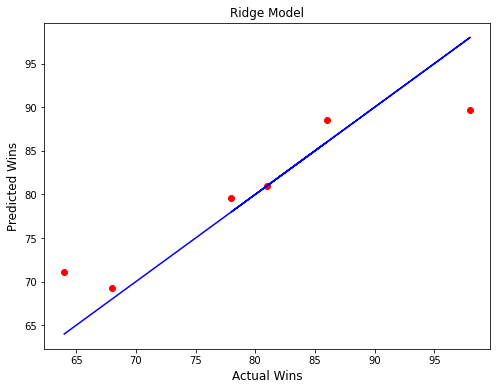

In [183]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predridge,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Wins",fontsize=12)
plt.ylabel("Predicted Wins",fontsize=12)
plt.title("Ridge Model")
plt.show()

#### Saving the final model


In [176]:
import pickle

In [177]:
filename=('Baseball case.pkl')

In [179]:
pickle.dump(ridge,open(filename,'wb'))

In [180]:
#conclusion
loaded_model=pickle.load(open('Baseball case.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

83.02501370244788


##### our final model is giving me 83% approx accuracy

In [181]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predridge[:]],index=['Predcited','Orignal'])
conclusion

,0,1,2,3,4,5
Predcited,80.929712,89.73624,79.624402,88.586417,69.304944,71.058723
Orignal,80.929712,89.73624,79.624402,88.586417,69.304944,71.058723


#### Steps I followd in the above Dataset.
.
1- loaded the dataset and checked for shape,datatype information, columns and  checked for null /missing value(if any) and took the neccessary step 

2-Checked for unique values count and plot a bar of it(count plot)

3-Described the dataset using .describe() method and wrote down the observation for min, max, mean ,std and skewness.

4- Visulise the skewness using distplot and boxplot techniques after cheking it using.skew() method.

4- Used zscore() method to remove outliers and again checked for skewness and found skewness in dataset so used np.log() method and again chekd for skewness .

5-Checked for Multicoliearity and cooreation using .corr() method and heatmap plot and dropped the highly correlated feture afer checking the vif for all the columns.

6- Plotted pairplot and scarrterplot to understand the relationships between multiple variables and identifying any patterns or correlations.

7-Done Bivariate Analysis

7- Split the dataset into features and label and applying transormation on feature using MinMax method.

8- Found the best random_state and wrote down single function for mulitple model evaluation.

9- Evaluate the different models based on score, r2_score and mean_squared_error.

10- Calculated CV score and selected the best model which had least difference between r2_score and CV score(Ridge Model).

11- Hypertuned the parameter using GridsearchCV and again calculated the scores and r2score increased( for Ridge model)(from 0.77 to 0.83).

12- vislauize the model

13- Saved the model using pickle library

14- Compared  the predicted and Original values